In [2]:
%load_ext autoreload
%autoreload 2

import datajoint as dj
dj.config["enable_python_native_blobs"] = True
dj.config['nnfabrik.schema_name'] = "nnfabrik_v1_tuning"
schema = dj.schema("nnfabrik_v1_tuning")

import numpy as np
import matplotlib.pyplot as plt

from nnfabrik.main import *

from nndichromacy.tables.scores import TestCorrelationEnsemble
from nndichromacy.tables.from_mei import MEISelector

Connecting pawelp@134.2.168.16:3306


In [25]:
schema.jobs & dict(status='error')

table_name className of the table,key_hash key hash,"status if tuple is missing, the job is available",key structure containing the key,error_message error message returned if failed,error_stack error stack if failed,user database user,host system hostname,pid system process id,connection_id connection_id(),timestamp automatic timestamp


In [2]:
# %%writefile run_scripts/test_correlations_run.py
import datajoint as dj
dj.config["enable_python_native_blobs"] = True
dj.config['nnfabrik.schema_name'] = "nnfabrik_v1_tuning"
schema = dj.schema("nnfabrik_v1_tuning")

from nndichromacy.tables.measures import SignalToNoiseRatio

dataset_key = {
    'dataset_hash': '72930dd1be6c229df4be82f74803262c' # Set the dataset here
}

MEISelector().populate(dataset_key, display_progress=True, reserve_jobs=True)

SignalToNoiseRatio().populate(dataset_key, display_progress=True, reserve_jobs=True)

  0%|          | 0/1 [00:00<?, ?it/s]

/data/mouse/toliaslab/static/static25133-3-11-GrayImageNet-7bed7f7379d99271be5d144e5e59a8e7.zip does not exist locally. Trying to fetch.
Unzipping /data/mouse/toliaslab/static/static25133-3-11-GrayImageNet-7bed7f7379d99271be5d144e5e59a8e7.zip into /data/mouse/toliaslab/static


  0%|          | 0/1 [00:00<?, ?it/s]

/data/mouse/toliaslab/static/static25133-3-11-GrayImageNet-7bed7f7379d99271be5d144e5e59a8e7 exists already. Not unpacking /data/mouse/toliaslab/static/static25133-3-11-GrayImageNet-7bed7f7379d99271be5d144e5e59a8e7.zip


100%|██████████| 1/1 [03:19<00:00, 199.78s/it]


In [3]:
SignalToNoiseRatio().Units() & dataset_key & 'unit_snr > 0.5'

dataset_fn name of the dataset loader function,dataset_hash hash of the configuration object,unit_id unique neuron identifier,data_key unique session identifier,unit_snr A template for a computed unit score
nndichromacy.datasets.static_loaders,72930dd1be6c229df4be82f74803262c,1,25133-3-11,0.844448
nndichromacy.datasets.static_loaders,72930dd1be6c229df4be82f74803262c,5,25133-3-11,1.01594
nndichromacy.datasets.static_loaders,72930dd1be6c229df4be82f74803262c,6,25133-3-11,0.81185
nndichromacy.datasets.static_loaders,72930dd1be6c229df4be82f74803262c,8,25133-3-11,0.525234
nndichromacy.datasets.static_loaders,72930dd1be6c229df4be82f74803262c,10,25133-3-11,0.706747
nndichromacy.datasets.static_loaders,72930dd1be6c229df4be82f74803262c,14,25133-3-11,0.502741
nndichromacy.datasets.static_loaders,72930dd1be6c229df4be82f74803262c,16,25133-3-11,0.646386
nndichromacy.datasets.static_loaders,72930dd1be6c229df4be82f74803262c,19,25133-3-11,0.858453
nndichromacy.datasets.static_loaders,72930dd1be6c229df4be82f74803262c,22,25133-3-11,0.505461
nndichromacy.datasets.static_loaders,72930dd1be6c229df4be82f74803262c,23,25133-3-11,0.671152


In [17]:
dataset_key = {
    'dataset_hash': '72930dd1be6c229df4be82f74803262c', # Set the dataset here,
    'ensamble_key': '8a2aaa598935fa40a3f7db6f84209d5f' # Set ensamble key
}

In [9]:
TestCorrelationEnsemble.populate(dataset_key, reserve_jobs=True, display_progress=True)

  0%|          | 0/1 [00:00<?, ?it/s]

/data/mouse/toliaslab/static/static25133-3-11-GrayImageNet-7bed7f7379d99271be5d144e5e59a8e7 exists already. Not unpacking /data/mouse/toliaslab/static/static25133-3-11-GrayImageNet-7bed7f7379d99271be5d144e5e59a8e7.zip


/src/nnfabrik/nnfabrik/templates/trained_model.py:209: UserWarning: Model could not be built without the dataloader. Dataloader will be built in order to create the model. Make sure to have an The 'model_fn' also has to be able toaccept 'data_info' as an input arg, and use that over the dataloader to build the model.
  warnings.warn(


/data/mouse/toliaslab/static/static25133-3-11-GrayImageNet-7bed7f7379d99271be5d144e5e59a8e7 exists already. Not unpacking /data/mouse/toliaslab/static/static25133-3-11-GrayImageNet-7bed7f7379d99271be5d144e5e59a8e7.zip


/src/nnfabrik/nnfabrik/templates/trained_model.py:209: UserWarning: Model could not be built without the dataloader. Dataloader will be built in order to create the model. Make sure to have an The 'model_fn' also has to be able toaccept 'data_info' as an input arg, and use that over the dataloader to build the model.
  warnings.warn(


/data/mouse/toliaslab/static/static25133-3-11-GrayImageNet-7bed7f7379d99271be5d144e5e59a8e7 exists already. Not unpacking /data/mouse/toliaslab/static/static25133-3-11-GrayImageNet-7bed7f7379d99271be5d144e5e59a8e7.zip


/src/nnfabrik/nnfabrik/templates/trained_model.py:209: UserWarning: Model could not be built without the dataloader. Dataloader will be built in order to create the model. Make sure to have an The 'model_fn' also has to be able toaccept 'data_info' as an input arg, and use that over the dataloader to build the model.
  warnings.warn(


/data/mouse/toliaslab/static/static25133-3-11-GrayImageNet-7bed7f7379d99271be5d144e5e59a8e7 exists already. Not unpacking /data/mouse/toliaslab/static/static25133-3-11-GrayImageNet-7bed7f7379d99271be5d144e5e59a8e7.zip


/src/nnfabrik/nnfabrik/templates/trained_model.py:209: UserWarning: Model could not be built without the dataloader. Dataloader will be built in order to create the model. Make sure to have an The 'model_fn' also has to be able toaccept 'data_info' as an input arg, and use that over the dataloader to build the model.
  warnings.warn(


/data/mouse/toliaslab/static/static25133-3-11-GrayImageNet-7bed7f7379d99271be5d144e5e59a8e7 exists already. Not unpacking /data/mouse/toliaslab/static/static25133-3-11-GrayImageNet-7bed7f7379d99271be5d144e5e59a8e7.zip


/src/nnfabrik/nnfabrik/templates/trained_model.py:209: UserWarning: Model could not be built without the dataloader. Dataloader will be built in order to create the model. Make sure to have an The 'model_fn' also has to be able toaccept 'data_info' as an input arg, and use that over the dataloader to build the model.
  warnings.warn(


/data/mouse/toliaslab/static/static25133-3-11-GrayImageNet-7bed7f7379d99271be5d144e5e59a8e7 exists already. Not unpacking /data/mouse/toliaslab/static/static25133-3-11-GrayImageNet-7bed7f7379d99271be5d144e5e59a8e7.zip


100%|██████████| 1/1 [03:36<00:00, 216.63s/it]


In [26]:
dropped_units = (TestCorrelationEnsemble().Units() * SignalToNoiseRatio().Units() & dataset_key).fetch('unit_avg_correlation', 'unit_snr', as_dict=True)

np.random.seed(1000)
selected_units = (TestCorrelationEnsemble().Units() * SignalToNoiseRatio().Units() & dataset_key & 'unit_snr > 0.5').fetch('unit_avg_correlation', 'unit_snr', as_dict=True)
selected_units = [selected_units[idx] for idx in np.random.choice(range(len(selected_units)), size=150, replace=False)]

/usr/local/lib/python3.8/dist-packages/datajoint/connection.py:218: UserWarning: MySQL server has gone away. Reconnecting to the server.
  warnings.warn("MySQL server has gone away. Reconnecting to the server.")


### TestCorrelation plot

In [ ]:
import pandas as pd

data = []
for unit in dropped_units:
    data.append(dict(**unit, type='dropped'))
    

for unit in selected_units:
    data.append(dict(**unit, type='selected'))
    
df = pd.DataFrame(data)

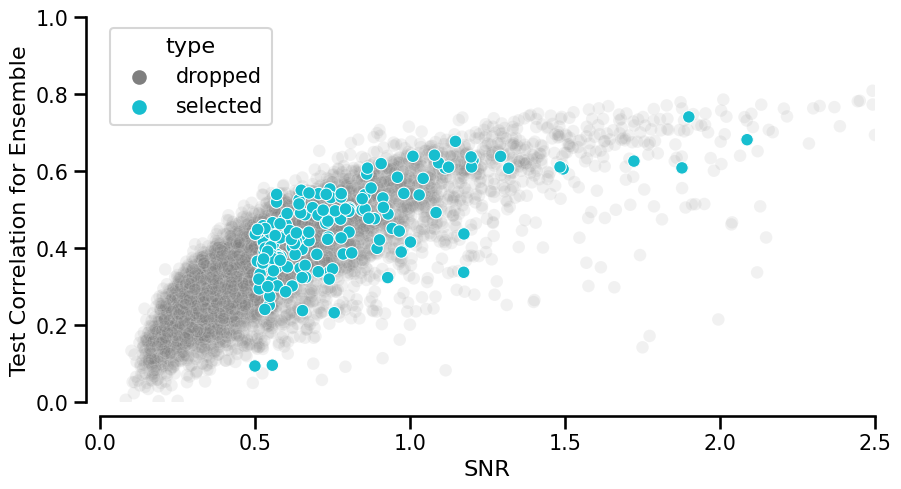

In [30]:
import seaborn as sns

plt.figure(figsize=(10, 5))

plt.style.use('default')
sns.set_context('talk', font_scale=0.9)

sns.scatterplot(x='unit_snr', y='unit_avg_correlation', hue='type', palette=['tab:gray'], alpha=0.1, data=df[df['type'] == 'dropped'])
sns.scatterplot(x='unit_snr', y='unit_avg_correlation', hue='type', palette=['tab:cyan'], alpha=1, data=df[df['type'] == 'selected'])

plt.xlim(-0, 2.5)
plt.ylim(-0, 1)

plt.xlabel('SNR')
plt.ylabel('Test Correlation for Ensemble')

sns.despine(trim=True, offset=10) 

plt.savefig('../../imgs/selected_units.png', dpi=100, bbox_inches='tight')

plt.show()